# Purpose of this notebook

This notebook is used to visualise the features from the numpy arrays extracted by extract_arrays.ipynb. It is not required in the data processing pipeline.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import random

In [2]:
FEATURES_PATH = "data/my_20_sec_features-tcp-2022_07_04__16_17_26.npy"
LABELS_PATH = "data/my_20_sec_labels-tcp-2022_07_04__16_17_26.npy"

SEED = 42

In [3]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)

with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)

In [4]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([['www.amazon.co.uk', '10'],
       ['www.bbc.co.uk', '9'],
       ['www.ebay.co.uk', '9'],
       ['www.facebook.com', '9'],
       ['www.google.co.uk', '14'],
       ['www.google.com', '16'],
       ['www.twitter.com', '18'],
       ['www.uwe.ac.uk', '7'],
       ['www.wikipedia.com', '16'],
       ['www.youtube.com', '12']], dtype='<U21')

([<matplotlib.patches.Wedge at 0x1392d3790>,
 [Text(-0.310582863166675, 1.1591109891236433, 'www.amazon.co.uk'),
  Text(-0.8260255125651286, 0.870449224591255, 'www.bbc.co.uk'),
  Text(-1.1311698068124352, 0.4005681816569038, 'www.ebay.co.uk'),
  Text(-1.189733823871975, -0.15663150492467498, 'www.facebook.com'),
  Text(-0.8917737316832538, -0.8029567930341733, 'www.google.co.uk'),
  Text(-0.06280303155346122, -1.19835544778154, 'www.google.com'),
  Text(0.8917739008342749, -0.8029566051729203, 'www.twitter.com'),
  Text(1.196300815244939, -0.09415072726375721, 'www.uwe.ac.uk'),
  Text(1.039230376870539, 0.6000001864912353, 'www.wikipedia.com'),
  Text(0.3708201581728782, 1.1412678959353242, 'www.youtube.com')],
 [Text(-0.18117333684722708, 0.6761480769887918, '8.3%'),
  Text(-0.48184821566299163, 0.507762047678232, '7.5%'),
  Text(-0.6598490539739206, 0.23366477263319385, '7.5%'),
  Text(-0.694011397258652, -0.09136837787272707, '7.5%'),
  Text(-0.5202013434818981, -0.4683914626032677

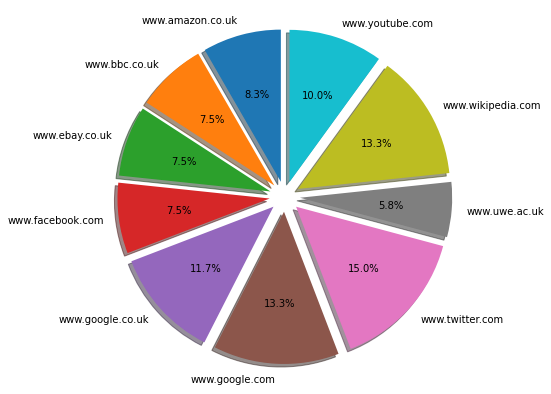

In [5]:
explode = [0.1] * len(frequencies[:,0])
plt.figure(figsize=(7,7))
plt.pie(frequencies[:,1], labels=frequencies[:,0], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

In [6]:
max = features.max()
print(f"Max value: {max}")
features_scaled = features/max

Max value: 131.0


(array([ 3.,  7., 10., 11., 14.,  3.,  5.,  1.,  2.,  0.,  2.,  4.,  0.,
         1.,  5.,  2.,  2.,  2.,  2.,  4.,  3.,  3.,  3.,  1.,  1.,  4.,
         4.,  0.,  1.,  1.,  1.,  1.,  0.,  4.,  0.,  1.,  1.,  1.,  1.,
         0.,  1.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  0.,  1.]),
 array([ 10.  ,  12.42,  14.84,  17.26,  19.68,  22.1 ,  24.52,  26.94,
         29.36,  31.78,  34.2 ,  36.62,  39.04,  41.46,  43.88,  46.3 ,
         48.72,  51.14,  53.56,  55.98,  58.4 ,  60.82,  63.24,  65.66,
         68.08,  70.5 ,  72.92,  75.34,  77.76,  80.18,  82.6 ,  85.02,
         87.44,  89.86,  92.28,  94.7 ,  97.12,  99.54, 101.96, 104.38,
        106.8 , 109.22, 111.64, 114.06, 116.48, 118.9 , 121.32, 123.74,
        126.16, 128.58, 131.  ]),
 <BarContainer object of 50 artists>)

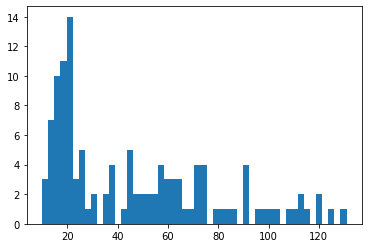

In [7]:
maxes = [arr.max() for arr in features]
plt.hist(maxes, bins=50)

In [8]:
unique_labels = np.unique(labels)

In [9]:
labels_df = pd.DataFrame(labels, columns=["label"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

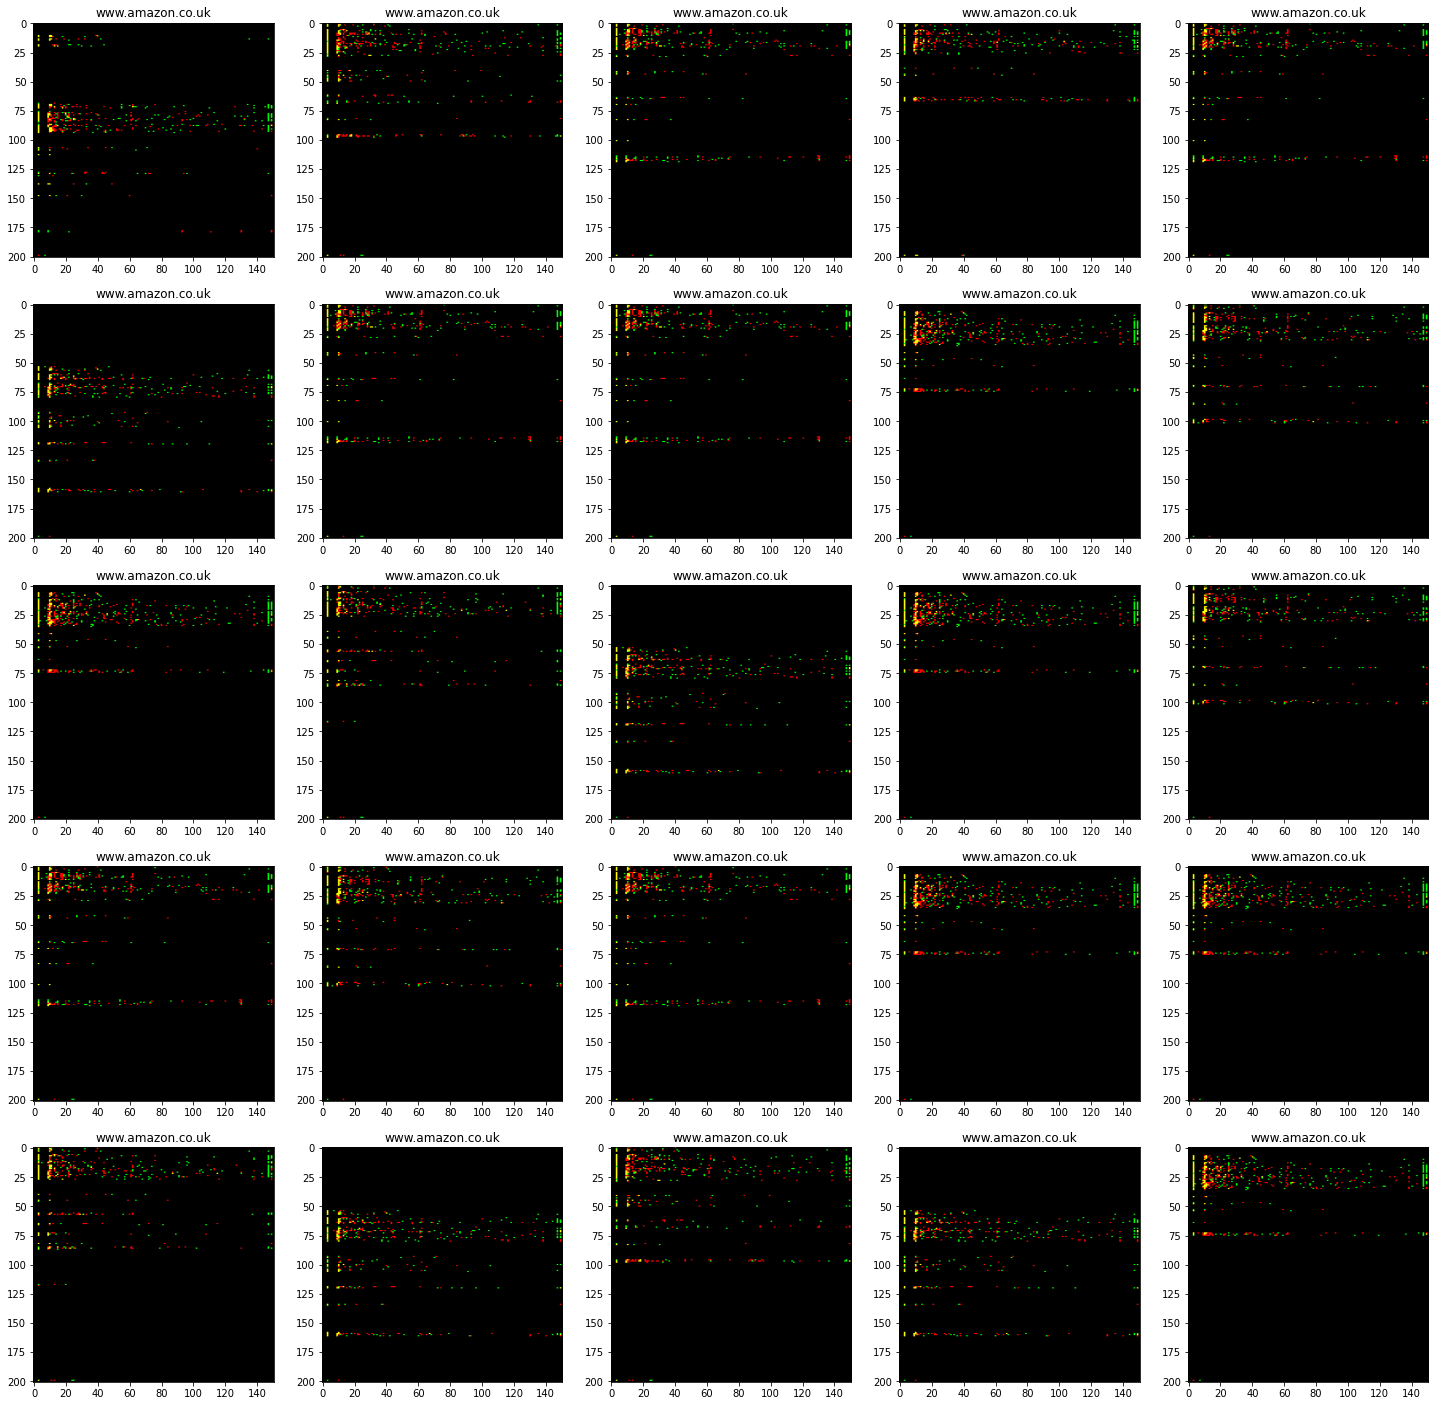

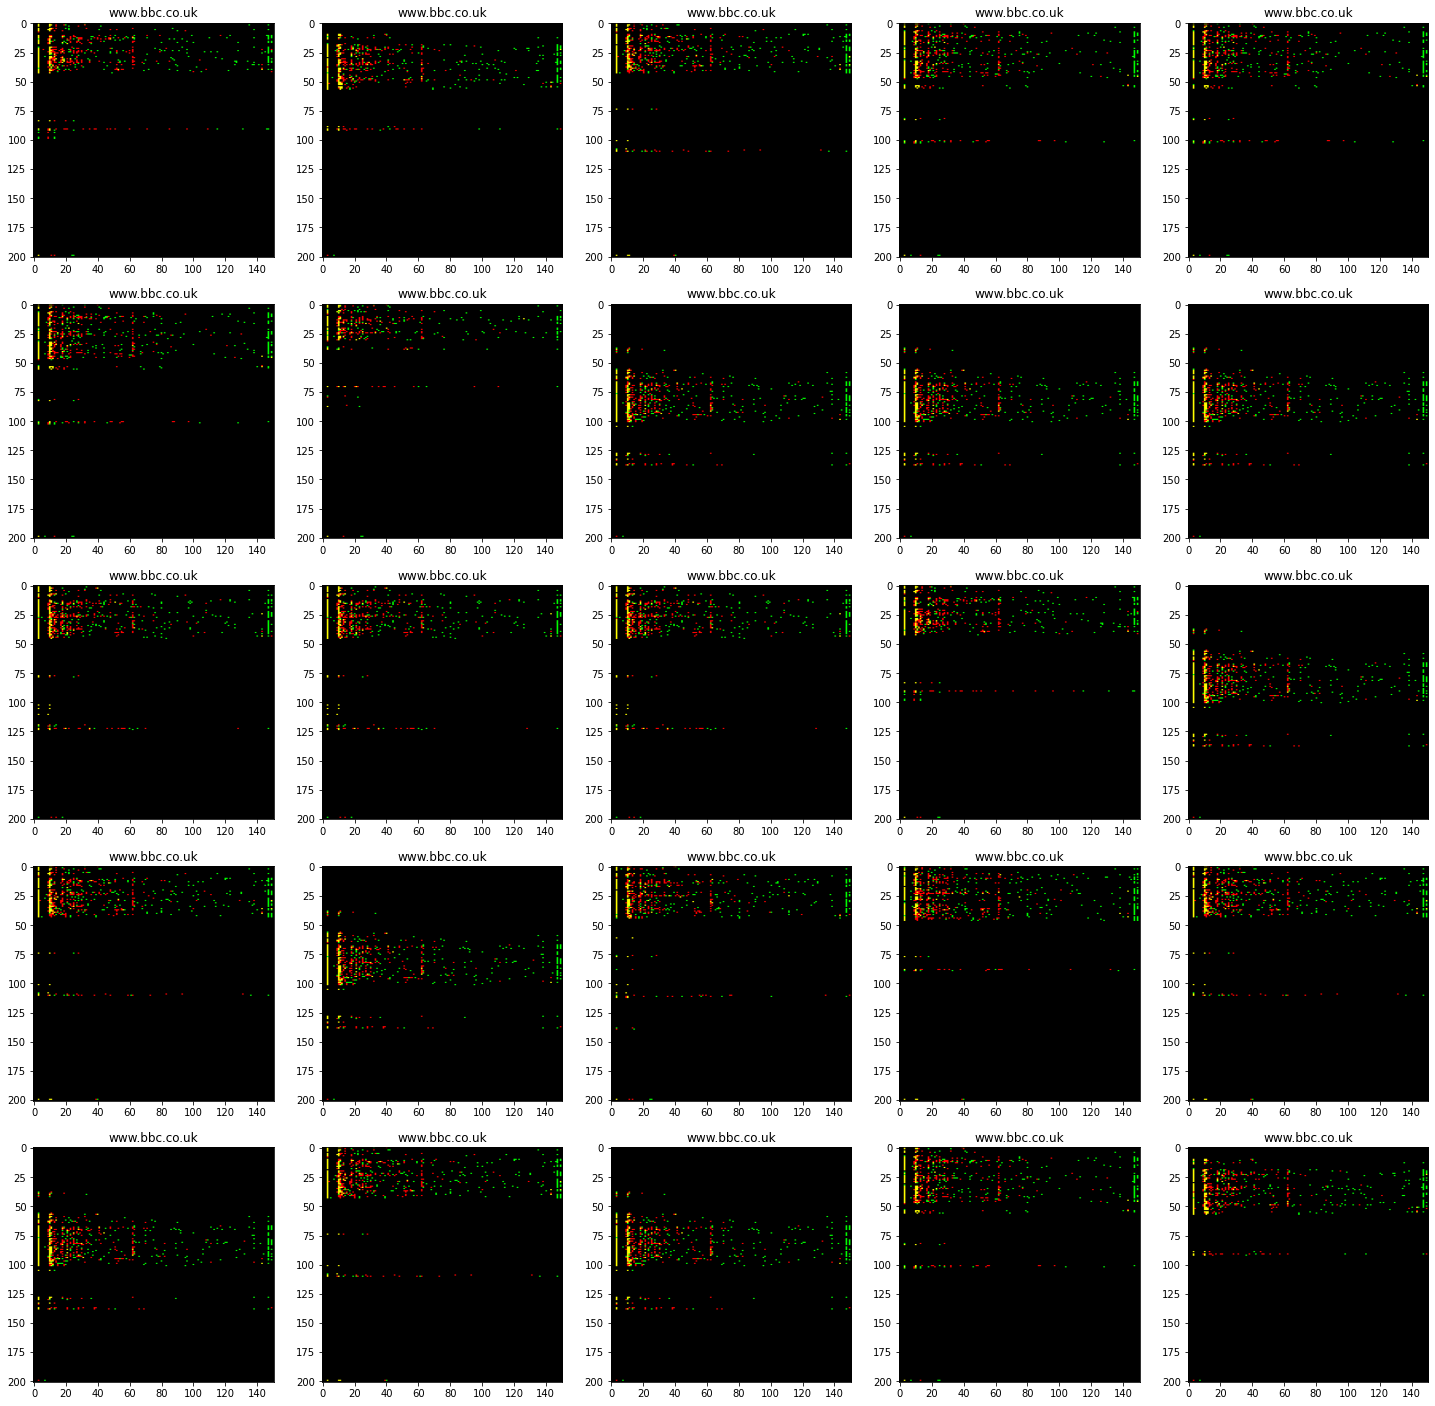

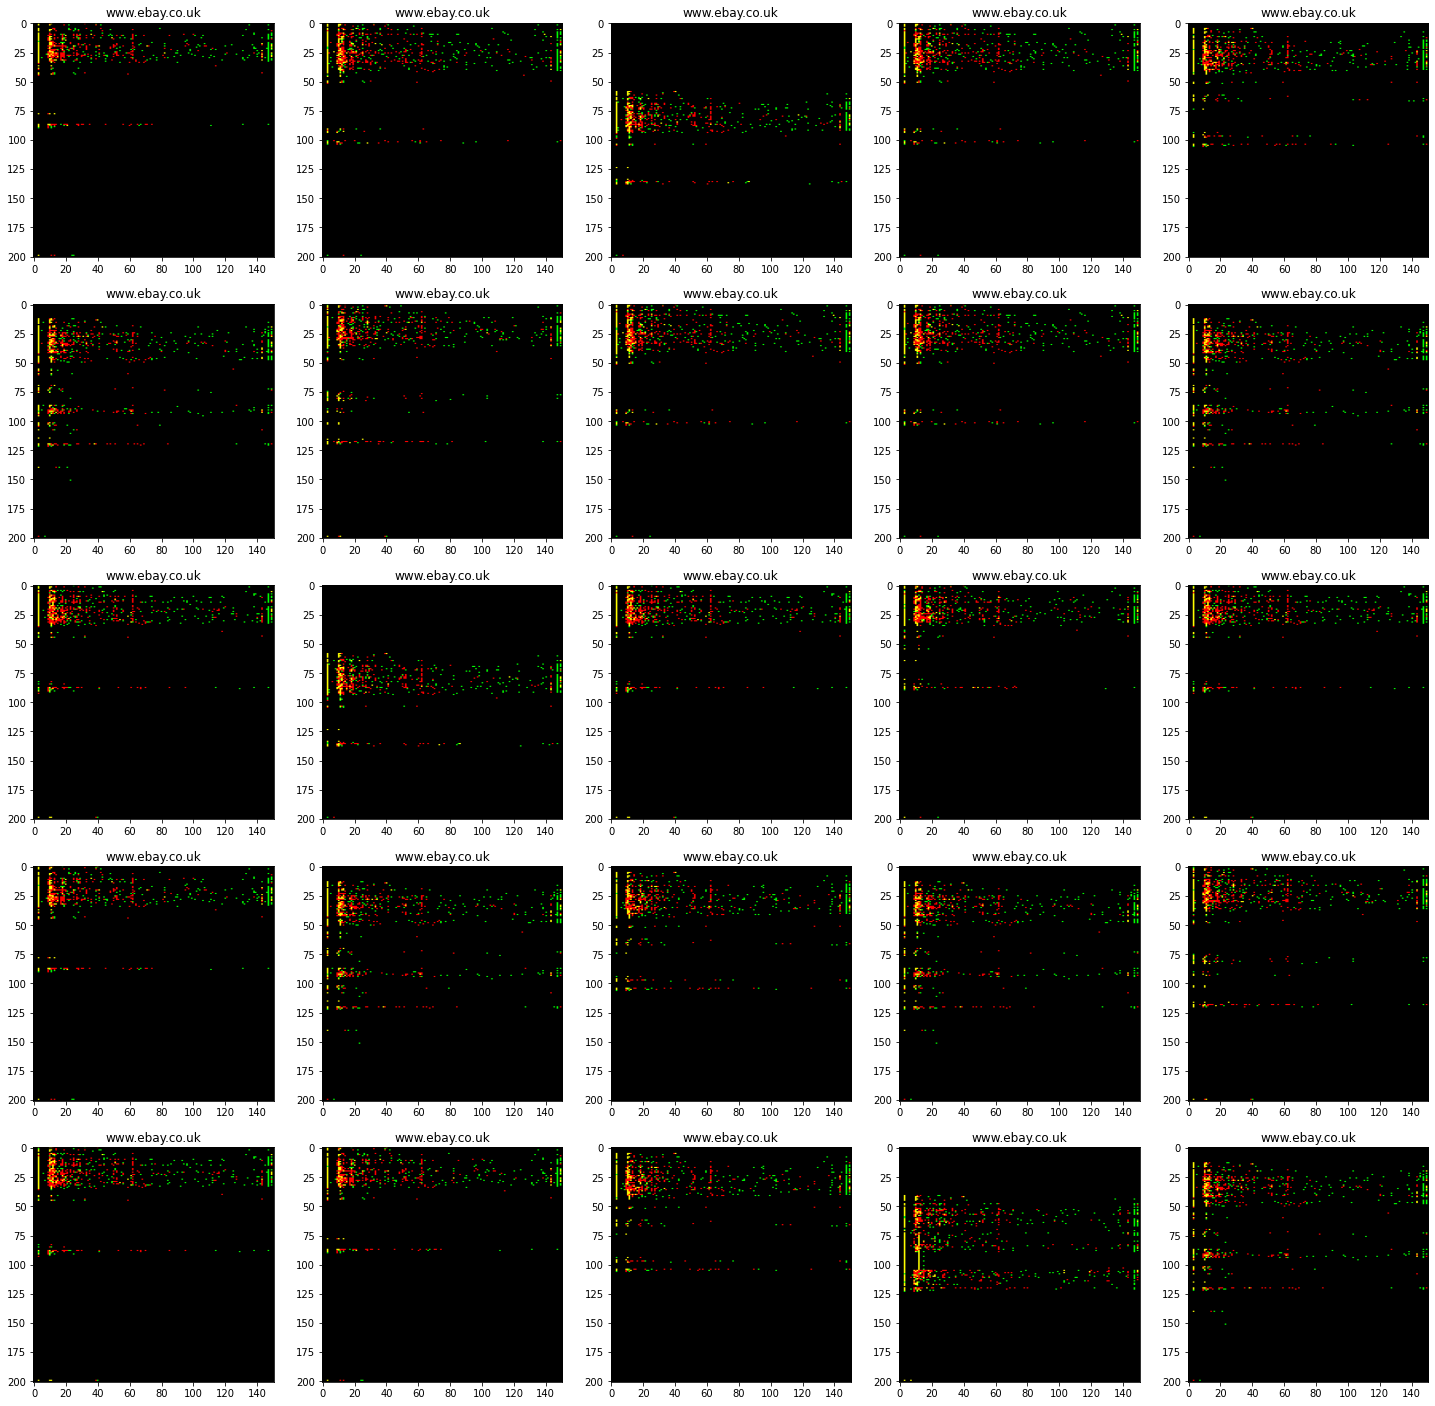

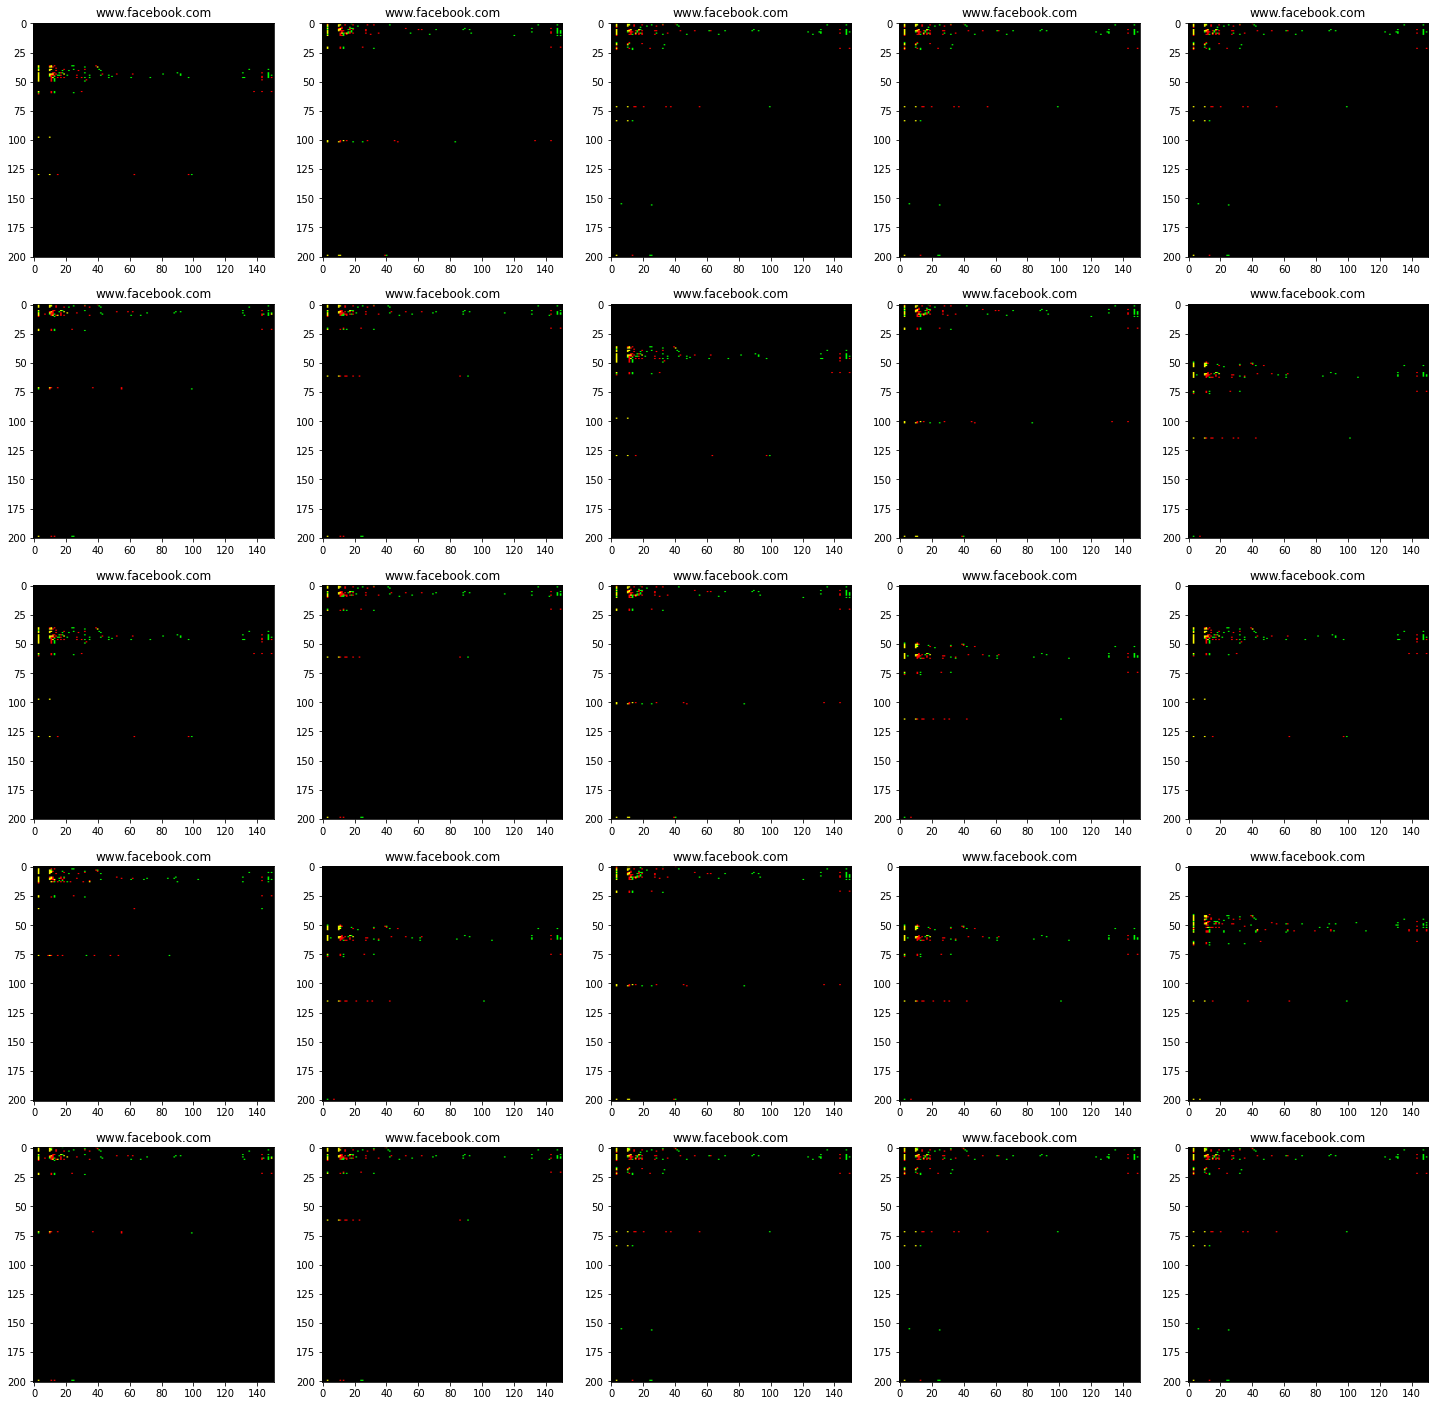

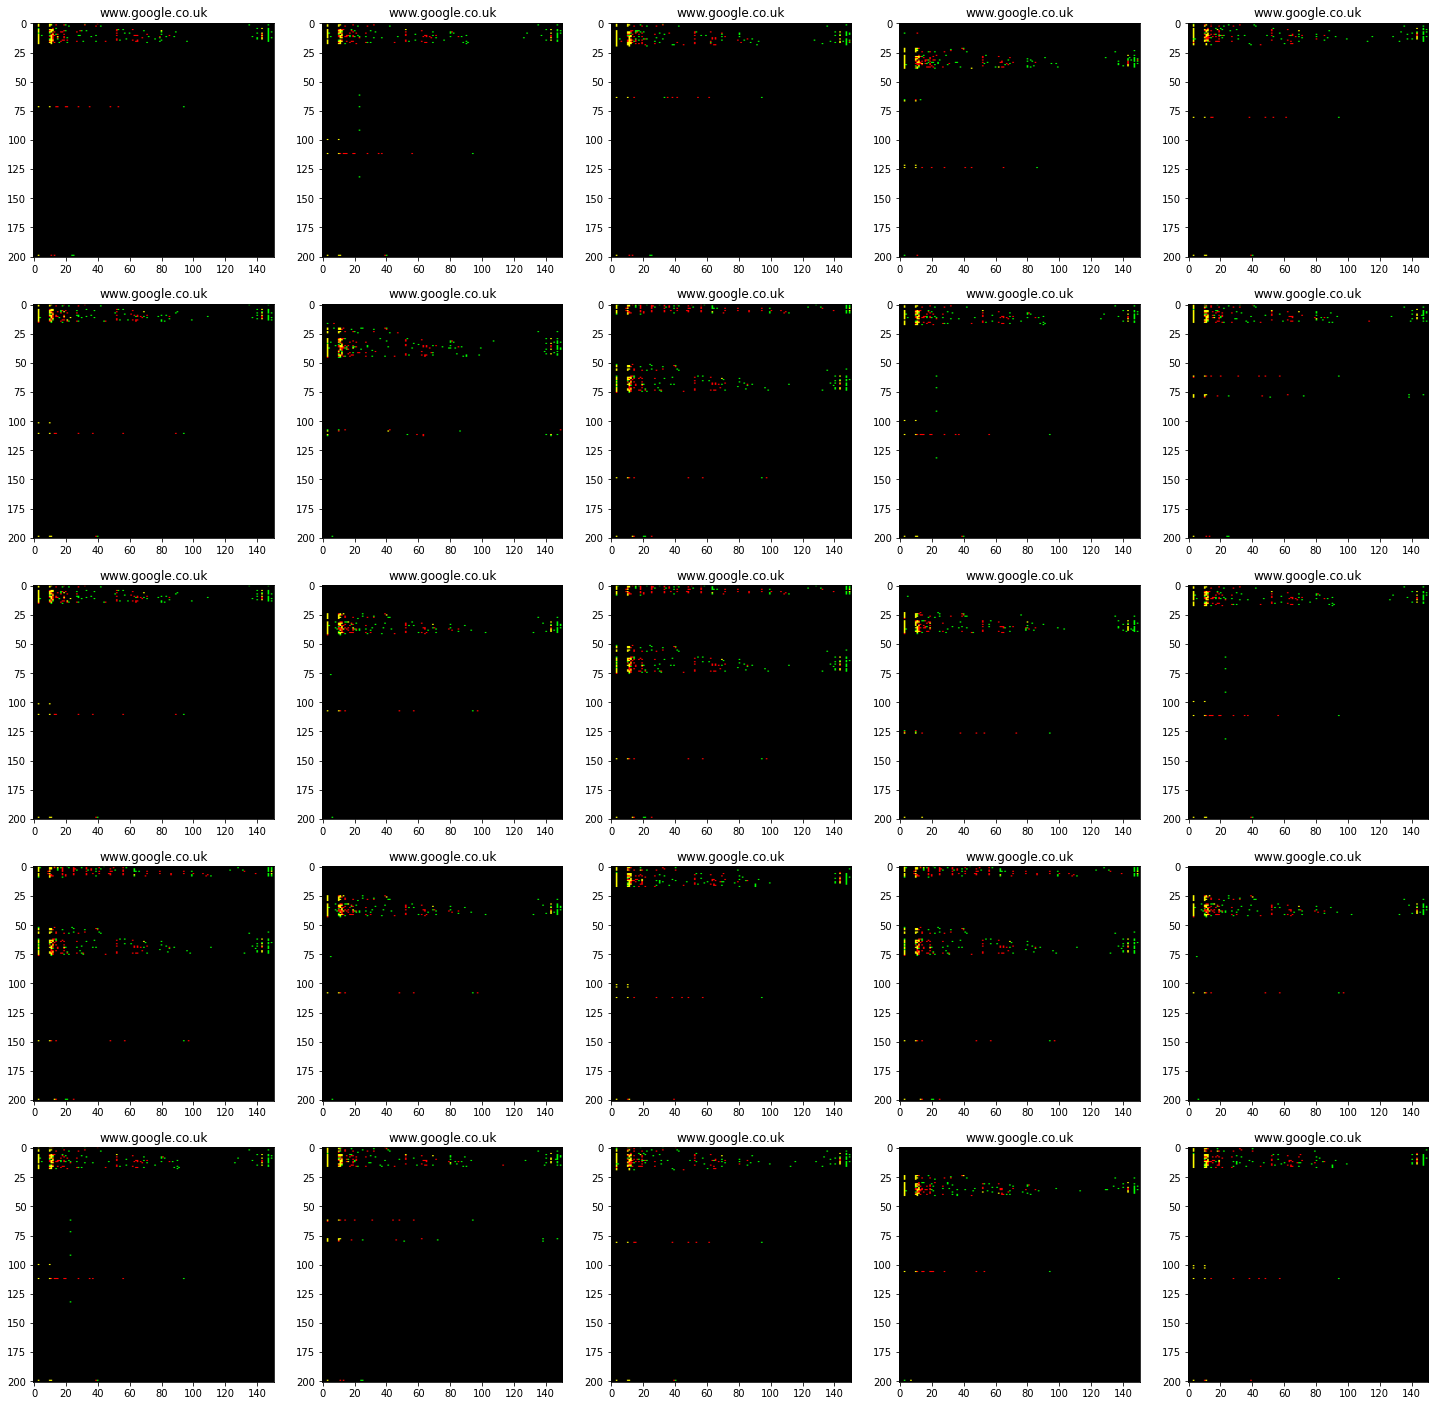

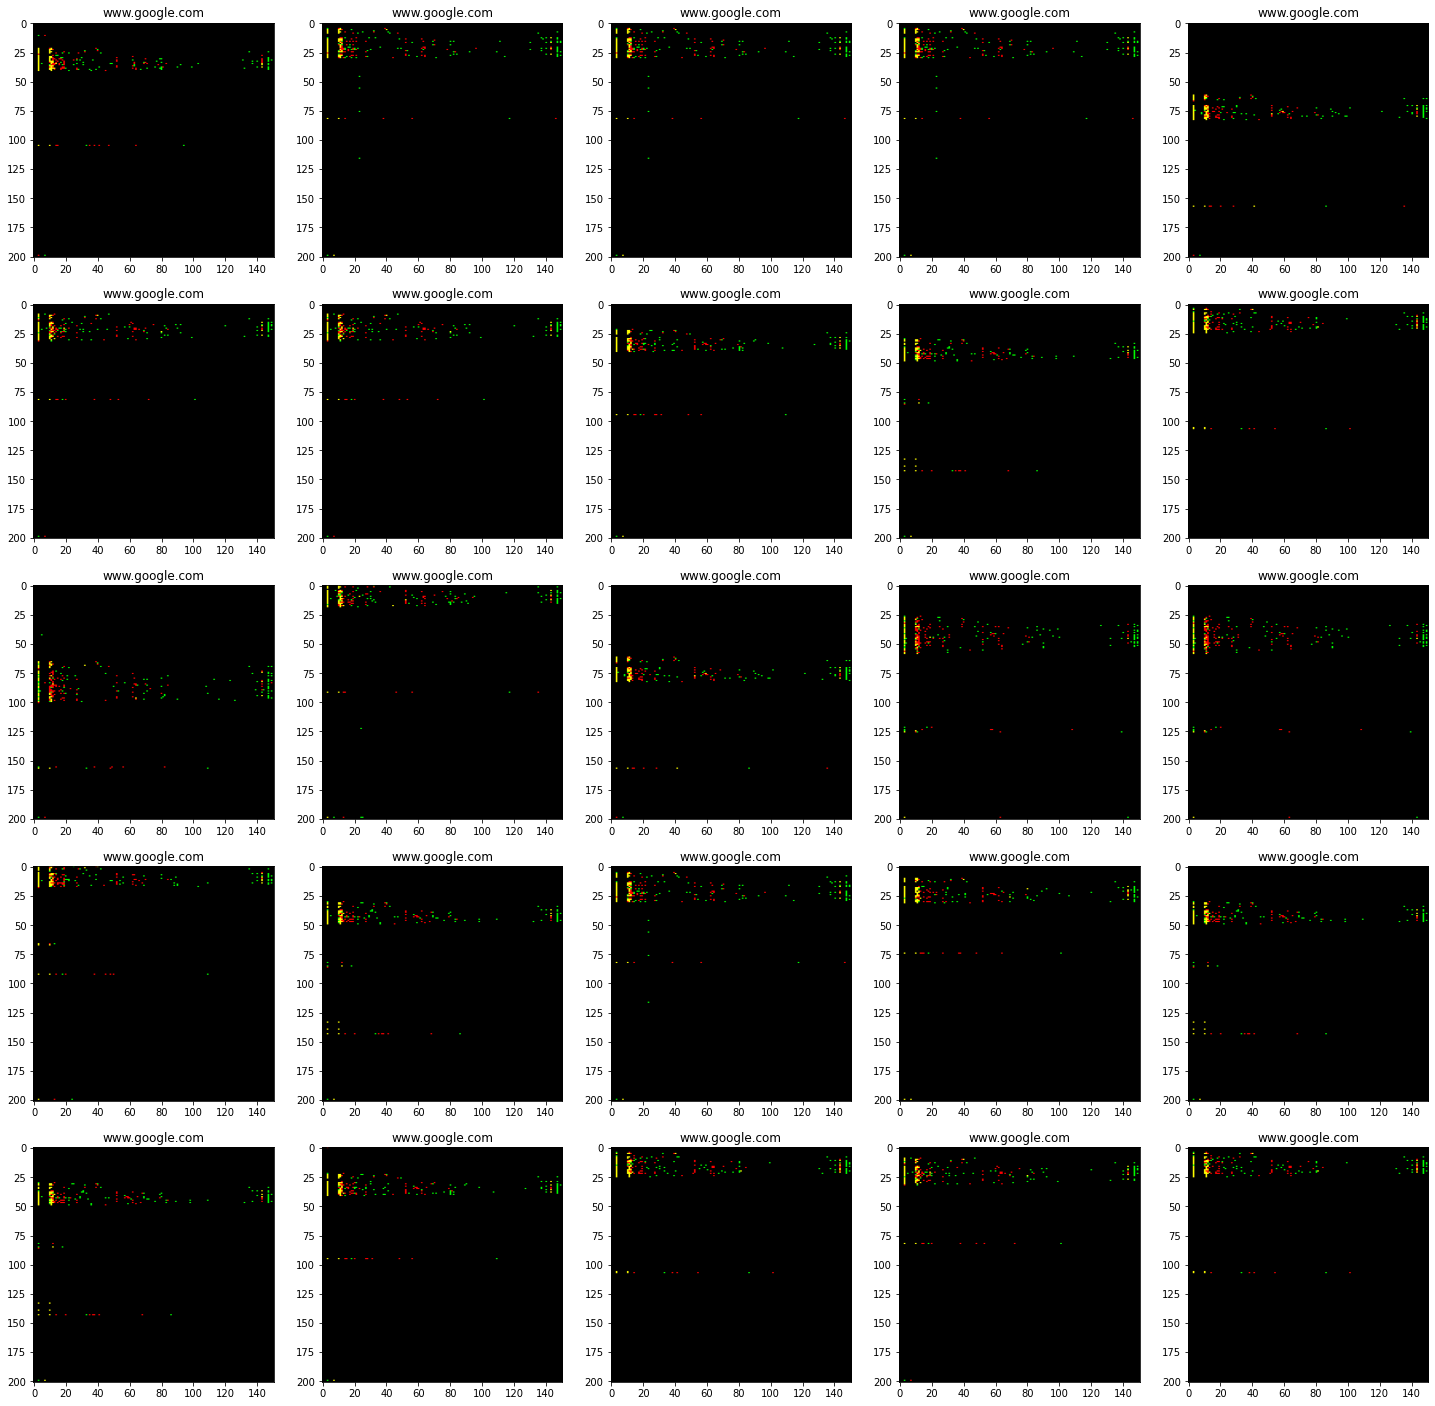

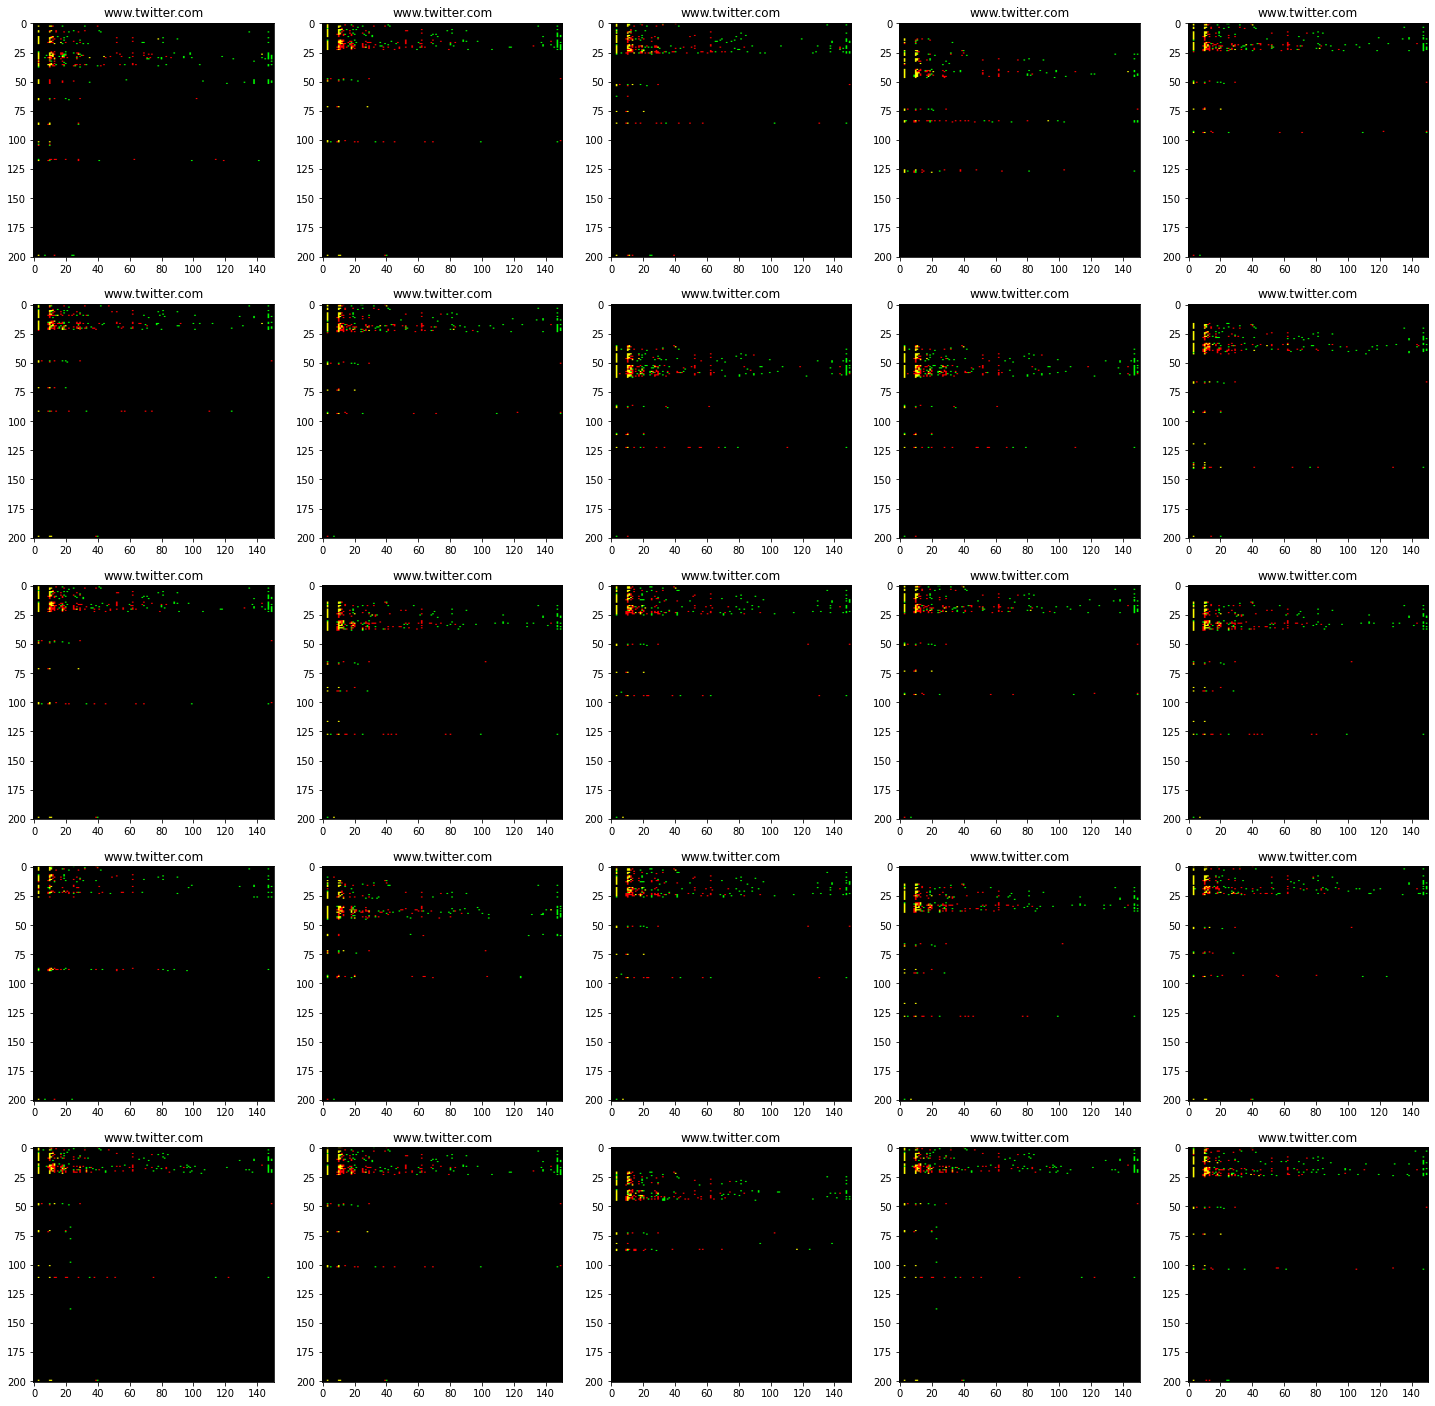

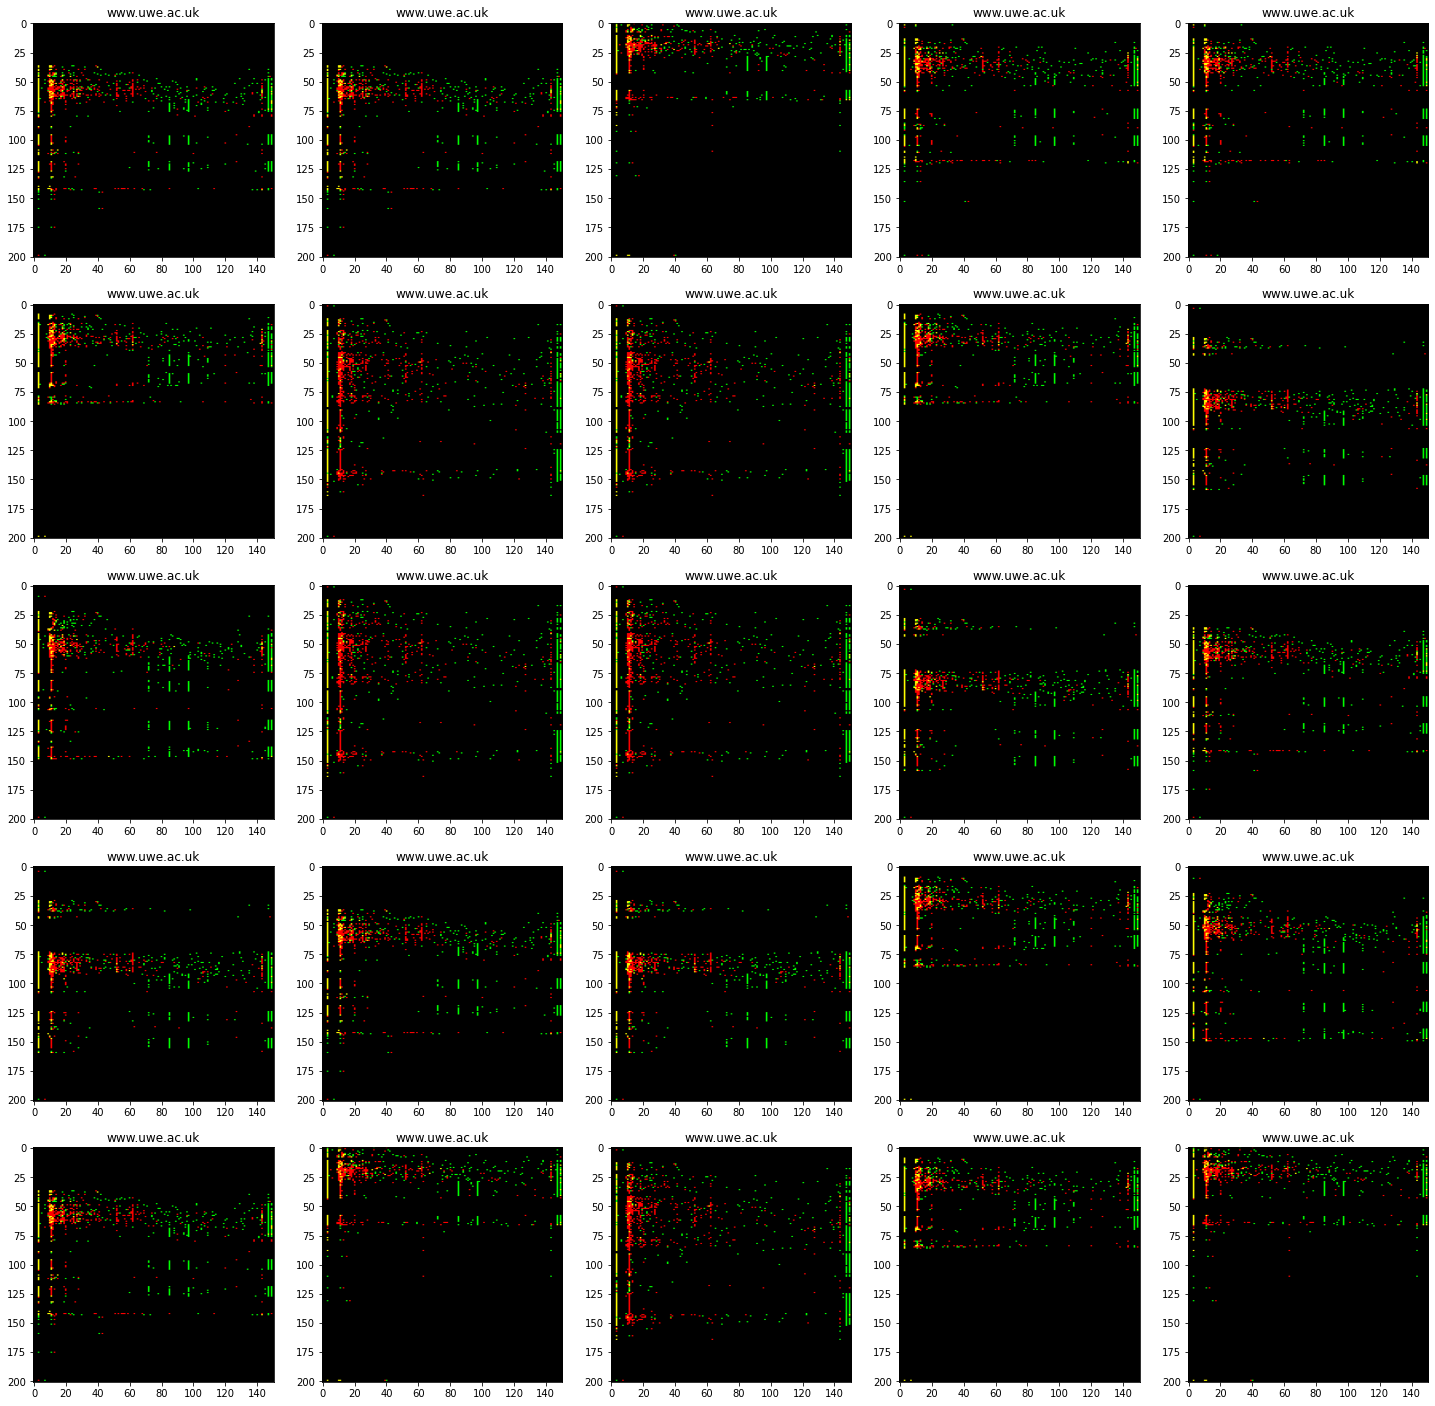

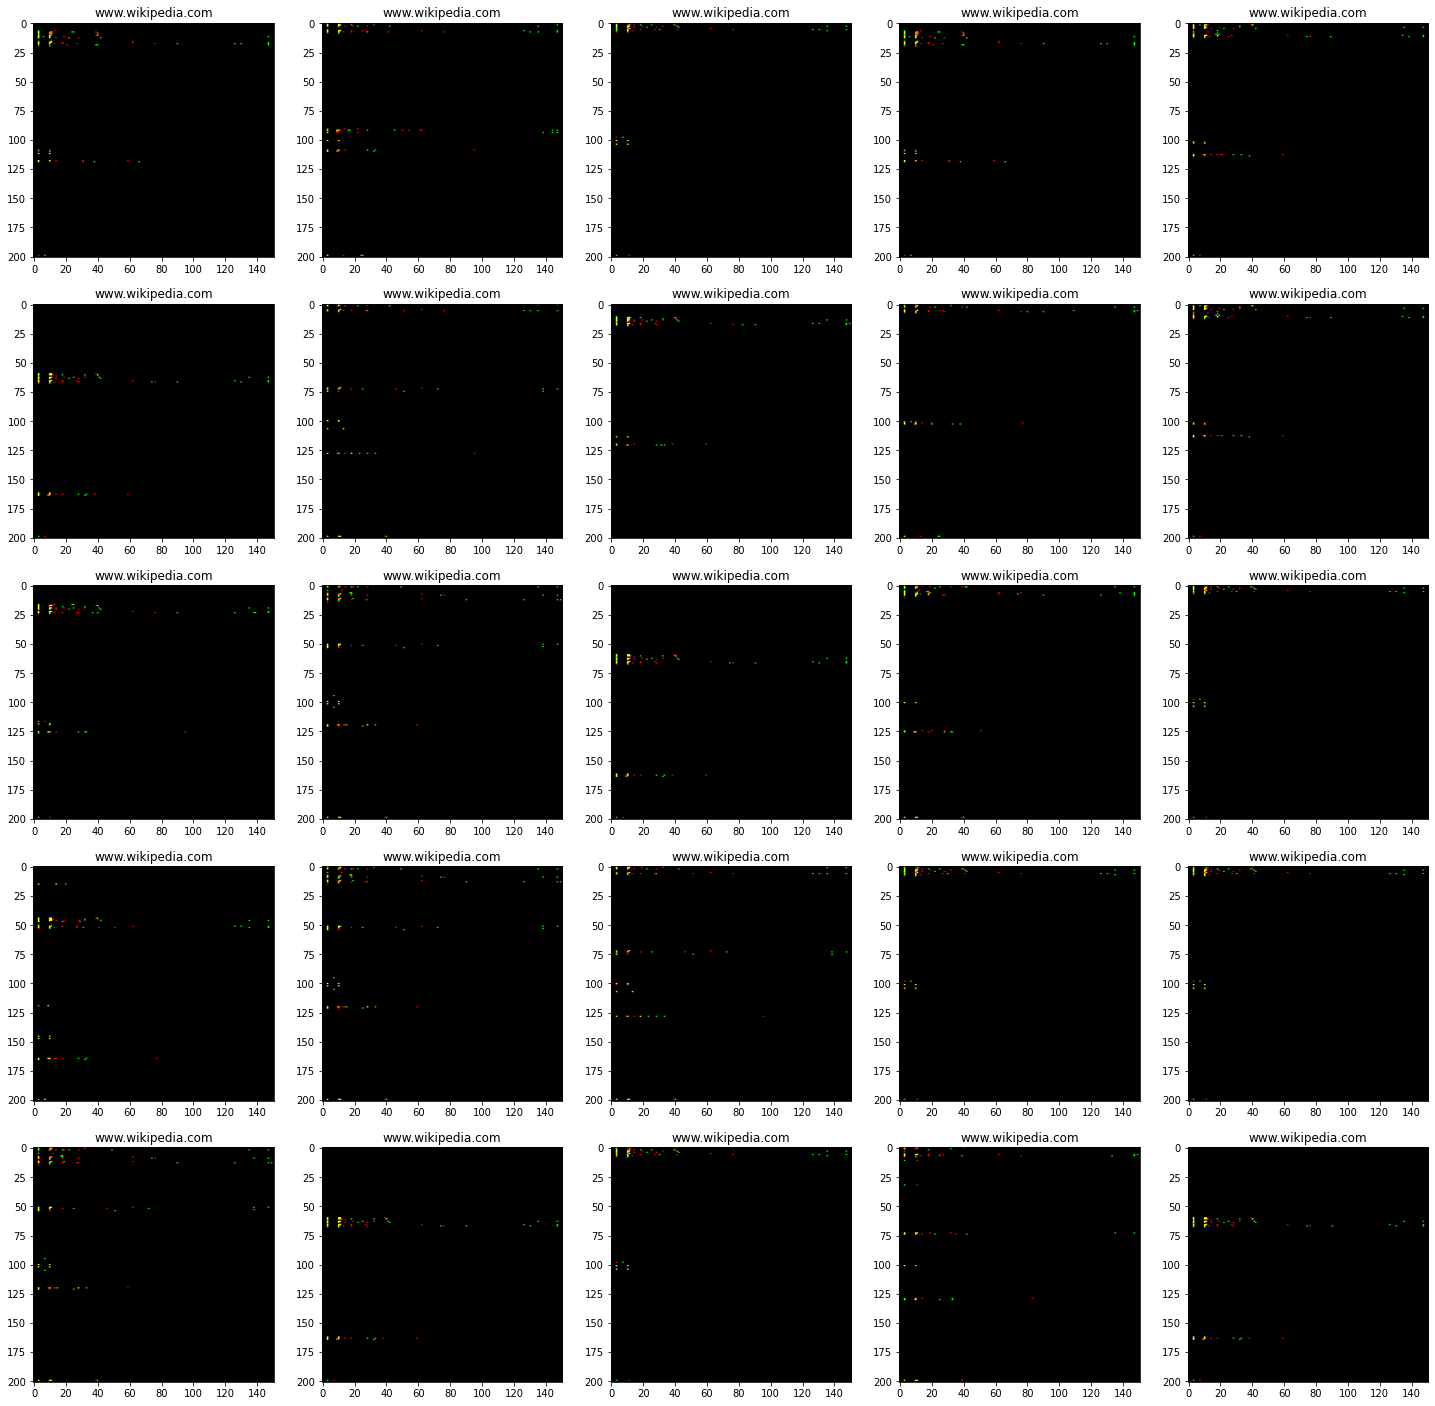

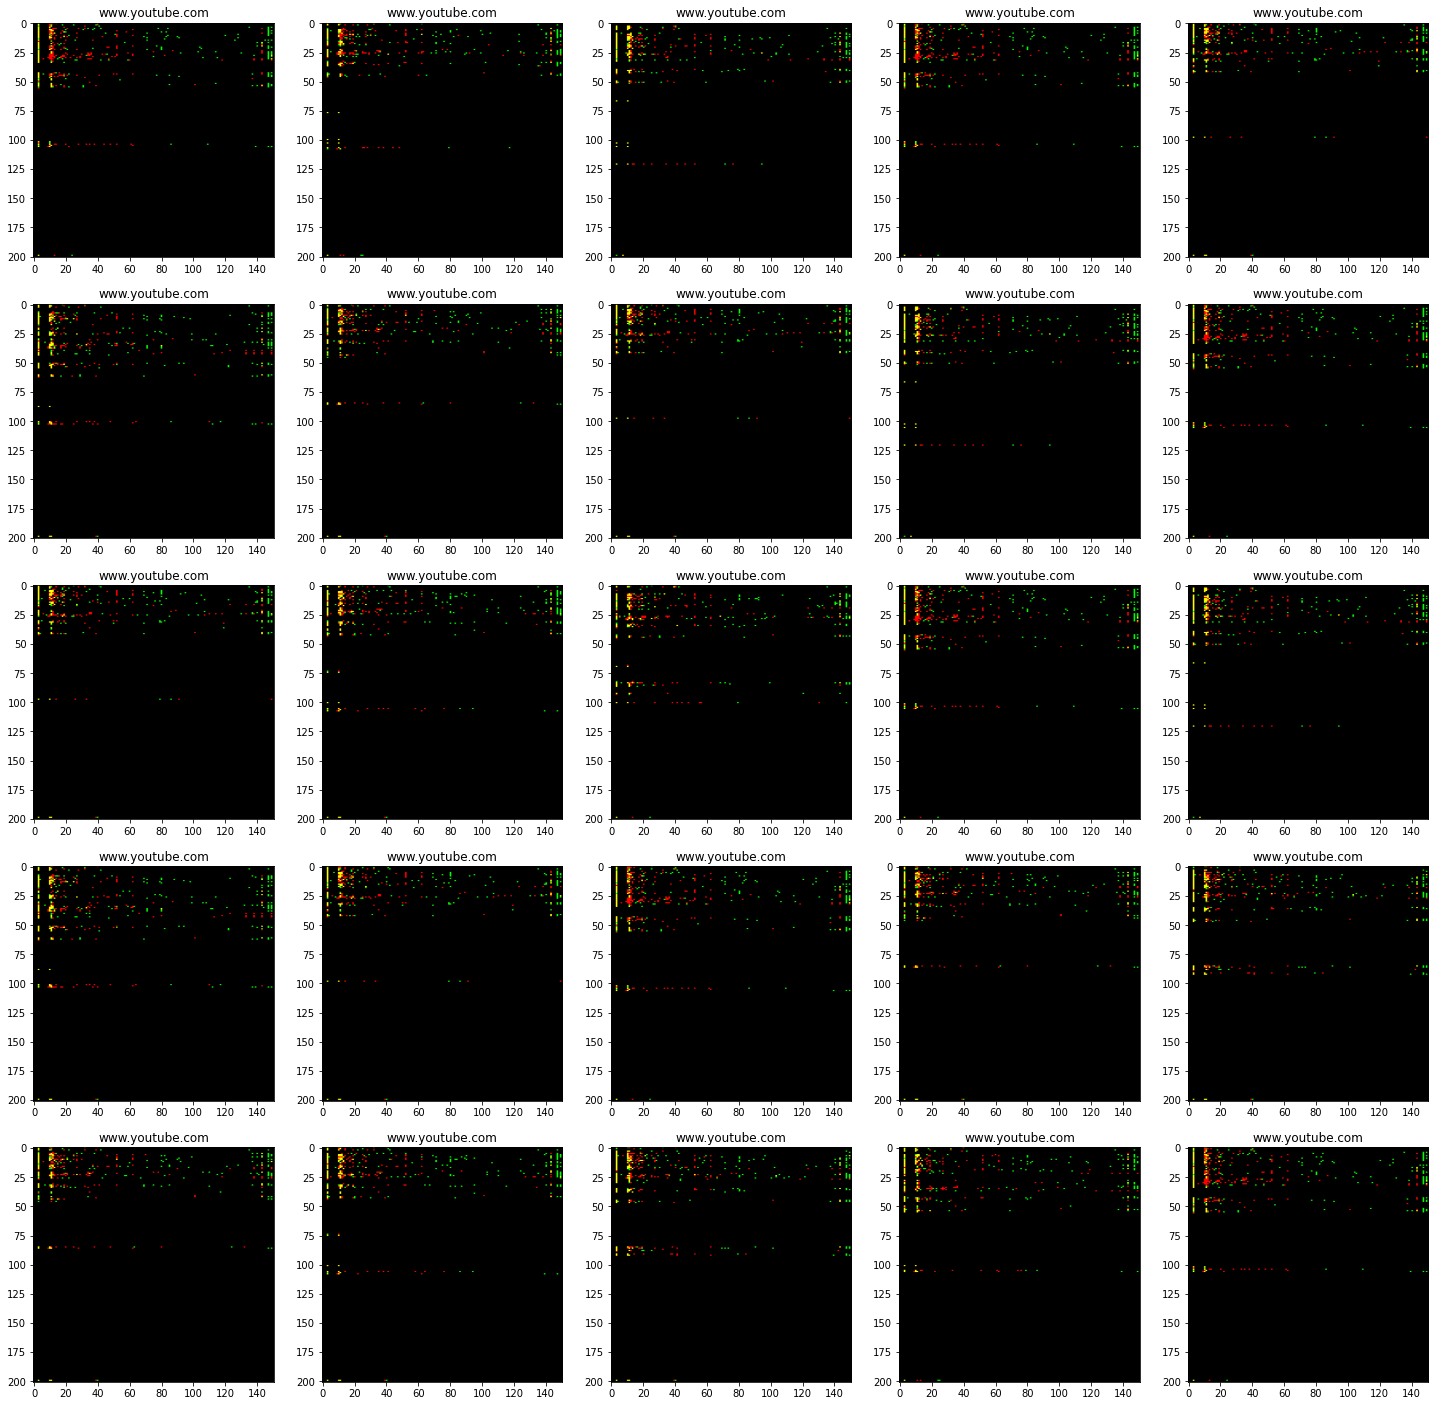

In [10]:
for label in unique_labels:

    indexes = labels_df[labels_df.label == label].index

    plt.figure(figsize=(25,25))

    
    for i in range(25):
        plt.subplot(5, 5, i +1)
        random_idx = random.randint(0, len(indexes) -1)
        plt.imshow(np.pad(features[indexes[random_idx]], (0,1)), aspect="auto")
        plt.title(f"{label}")